### смоделируем значение конверсии для 1500 показов, если знаем что реальная конверсия равна 0.05

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pymc3 as pm
import scipy.stats as stats
import numpy as np
#binomial = stats.binom
#Параметры представляют собой границы равномерного распределения
model=pm.Model()
with model:
    p = pm.Uniform('p',0,1)
    p_true = 0.05 # Помните, что на практике это значение неизвестно
    N = 1500
    #Выбираем N бернуллиевых случайных переменных из распределения ber(0,05)
    #Вероятность быть равной 1 для каждой из них составляет 0,05
    #Генерация данных:
    occurrences = stats.bernoulli.rvs(p_true, size=N)
    print (np.sum(occurrences)) #сколько было кликов
    print ('Чему равна наблюдаемая частота в группе A? %.3f' % occurrences.mean())
    print('Таким образом расчитанная конверсия всегда отличается от реальной')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\ProgramData\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C

63
Чему равна наблюдаемая частота в группе A? 0.042
Таким образом расчитанная конверсия всегда отличается от реальной


In [27]:
#Объединяем наблюдаемые данные в переменную РуМС с аргументом observed = True и запускаем алгоритм вывода:
with model:
    #obs = pm.Bernoulli("obs", p, observed=occurrences)
    # To be explained in chapter 3
    step = pm.Metropolis()
    trace = pm.sample(12000, step=step) #18000 в оригинале
    #burned_trace = trace[1000:]
    burned_trace=trace

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p]
Sampling 2 chains, 0 divergences: 100%|█| 25000/25000 [07:01<00:00, 59.37draws/s]
The number of effective samples is smaller than 25% for some parameters.


C:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Плотность')

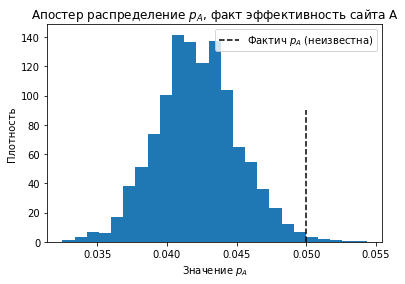

In [28]:
plt.title("Апостер распределение $p_A$, факт эффективность сайта A")
plt.vlines(p_true, 0, 90, linestyle="--", label="Фактич $p_A$ (неизвестна)")
plt.hist(burned_trace["p"], bins=25, histtype="stepfilled", normed=True)
plt.legend()
plt.xlabel("Значение $р_А$")
plt.ylabel('Плотность')

##### при сравнении двух вариантов, считаем отдельно распр для А и для В, затем считаем распределение дельты (А-В). Считаем количество дельт>0 и делим на общее число дельт. Получаем вероятность того, что А более эффективно